In [123]:
# import statistical tools
from __future__ import print_function
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [124]:
# import data visualisation tools
import matplotlib.pyplot as plt
from matplotlib import pylab
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns

In [125]:
# import and view first 10 items of file
url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Auto.csv"
Auto = pd.read_csv(url)
print(Auto.head())
print(list(Auto))
Auto = Auto.drop(Auto.index[[32, 126, 330, 336, 354]]) # removing rows containing "?". This is the easy way out. Such missing values need to be explored first in a real life situation.

    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']


In [126]:
# run regression (I am not visualising the data for the sake of brevity. But it is highly recommended as first step afer importing data)
Y = Auto.mpg.astype(float)
X = Auto.horsepower.astype(float)
model = ols("Y ~ X", data = Auto).fit()
print(model.summary())
print()
values = slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           7.03e-81
Time:                        18:20:59   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [127]:
X1 = Auto[['horsepower']]
Y1 = Auto['mpg']
lm = LinearRegression().fit(X1, Y1)
print("Coefficients: ", lm.coef_)
print("Intercepts: ", lm.intercept_)
Y2 = [[98]]
predictions = lm.predict(Y2)
print("Predicted value at X = 98: ", predictions)

Coefficients:  [-0.15784473]
Intercepts:  39.93586102117047
Predicted value at X = 98:  [24.46707715]


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



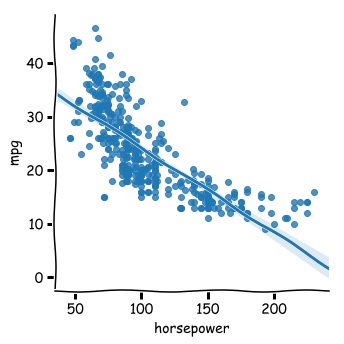

In [128]:
# plot relationships
plotdata = pd.concat([X, Y], axis = 1)
sns.lmplot(x = "horsepower", y = "mpg", data = plotdata)